In [2]:
import pandas as pd
import numpy as np 

In [3]:
file_path = 'car.csv'  
data = pd.read_csv(file_path)

In [4]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
data = data.dropna()

In [8]:
data['Years_Since_Manufacture'] = 2025 - data['Year']

In [9]:
# Encode categorical variables
encoded_data = pd.get_dummies(data, columns=['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True)


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

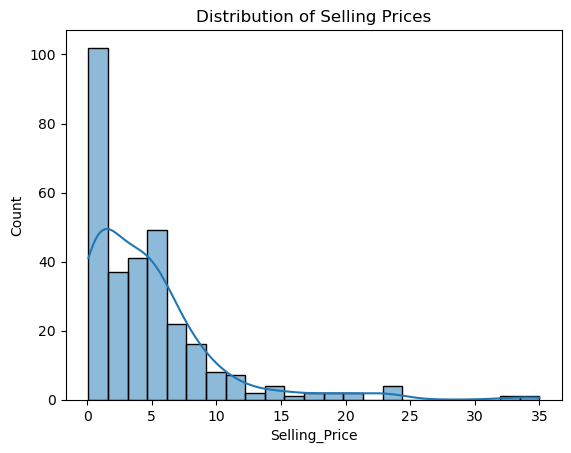

In [11]:
# Plot distributions
sns.histplot(encoded_data['Selling_Price'], kde=True)
plt.title('Distribution of Selling Prices')
plt.show()

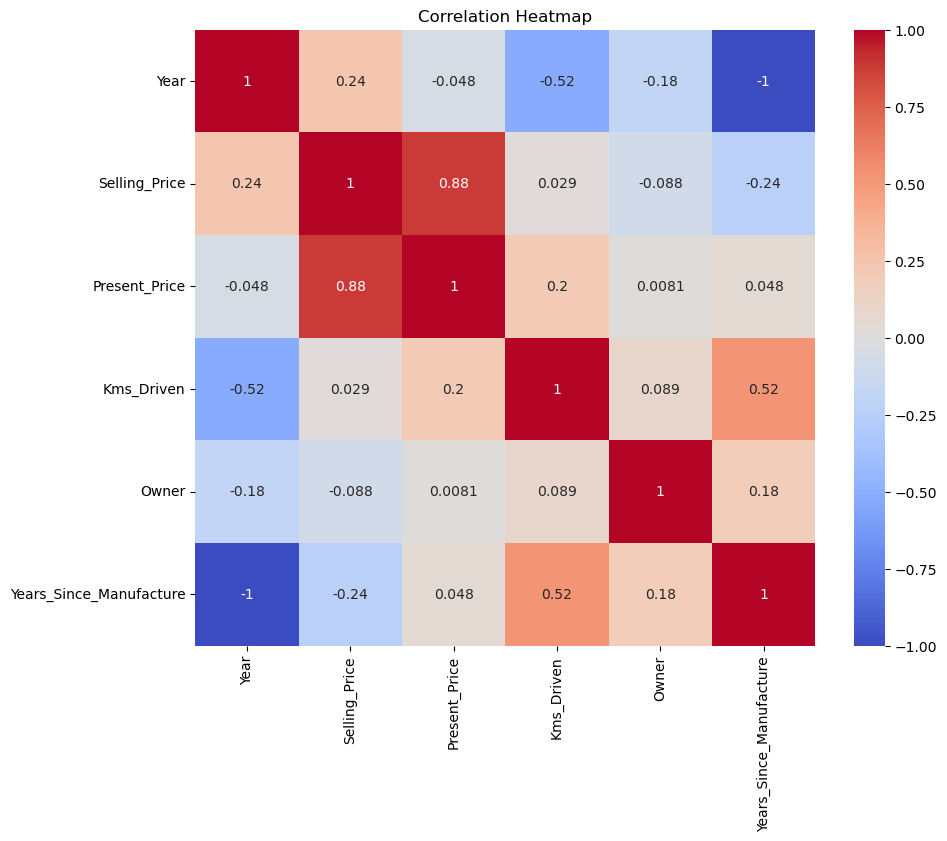

In [ ]:
# Correlation heatmap (numeric columns only)
plt.figure(figsize=(10, 8))
numeric_data = encoded_data.select_dtypes(include=[np.number])  
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [14]:
# Prepareing data for training.
X = encoded_data.drop(columns=['Selling_Price'])  
y = encoded_data['Selling_Price']

In [15]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# X_train is numeric and check for missing values
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])
print("Missing values in X_train:", X_train.isnull().sum().sum())
print("Missing values in y_train:", y_train.isnull().sum().sum())

Missing values in X_train: 0
Missing values in y_train: 0


In [21]:
# Using a Random Forest Regressor for training.
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [22]:
# Hyperparameter Tuning Optimizing  the model using RandomizedSearchCV.
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [23]:
# Performing  Randomized Search
random_search = RandomizedSearchCV(rf_model, param_grid, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_dept

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, verbose=2)

In [24]:
# Best parameters
print("Best Hyperparameters:", random_search.best_params_)


Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}


In [25]:
# Use the best model
best_model = random_search.best_estimator_

In [26]:
# Model Evaluation Evaluate the model using metrics like MSE and RMSE.

from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = best_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.9784162745418679
Root Mean Squared Error: 0.9891492680793268
R^2 Score: 0.9575258759472738


In [13]:
# Prepare the data for training
X = encoded_data.drop(columns=['Selling_Price'])  # Features
y = encoded_data['Selling_Price']  # Target variable

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Load the data
import pandas as pd

file_path = 'car.csv'  
data = pd.read_csv(file_path)

# Drop non-numeric columns (e.g., 'Car_Name')
data = data.drop(columns=['Car_Name'])  # Drop if the 'Car_Name' column exists

# Feature Engineering: Add "Years_Since_Manufacture"
data['Years_Since_Manufacture'] = 2025 - data['Year']

# Handle missing values (optional based on your dataset)
data = data.dropna()  # Alternatively, you can use data.fillna() if you'd rather impute missing values

# Encode categorical variables using one-hot encoding
encoded_data = pd.get_dummies(data, columns=['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True)

# Prepare the features (X) and target (y)
X = encoded_data.drop(columns=['Selling_Price'])  # Features (independent variables)
y = encoded_data['Selling_Price']  # Target variable (dependent variable)

# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify that the features are now numeric
print(X_train.dtypes)  # Ensure all columns are numeric

# Train the Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Initialize the RandomForest model
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform RandomizedSearchCV to tune hyperparameters
random_search = RandomizedSearchCV(rf_model, param_grid, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Train the model with the training data
random_search.fit(X_train, y_train)

# Get the best model from the random search
best_model = random_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Save the trained model
import joblib
joblib.dump(best_model, 'random_forest_model.pkl')


Year                         int64
Present_Price              float64
Kms_Driven                   int64
Owner                        int64
Years_Since_Manufacture      int64
Fuel_Type_Diesel              bool
Fuel_Type_Petrol              bool
Seller_Type_Individual        bool
Transmission_Manual           bool
dtype: object
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 

['random_forest_model.pkl']